<a href="https://colab.research.google.com/github/LeishaR/Song-Popularity-Prediction/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/final_batches.csv",  encoding='latin1')

# Define your target variable (popularity score) and features
target = 'Popularity Score'  # You can choose any name for the proxy variable
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Create a proxy popularity score based on the features (you can define your own formula)
data['Popularity Score'] = data[features].mean(axis=1)

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor (you can choose a different regression algorithm)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Print the predicted Popularity Scores
print("Predicted Popularity Scores:")
for idx, prediction in enumerate(y_pred):
    print(f"Song {idx + 1}: {prediction:.2f}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Predicted Popularity Scores:
Song 1: 13.10
Song 2: 13.71
Song 3: 14.38
Song 4: 10.89
Song 5: 8.21
Song 6: 14.01
Song 7: 10.35
Song 8: 16.61
Song 9: 11.25
Song 10: 9.06
Song 11: 19.30
Song 12: 12.36
Song 13: 9.00
Song 14: 8.10
Song 15: 13.65
Song 16: 11.34
Song 17: 12.61
Song 18: 16.20
Song 19: 14.20
Song 20: 12.33
Song 21: 13.82
Song 22: 9.85
Song 23: 12.37
Song 24: 11.80
Song 25: 13.47
Song 26: 18.87
Song 27: 17.10
Song 28: 14.96
Song 29: 18.20
Song 30: 15.15
Song 31: 16.17
Song 32: 15.49
Song 33: 15.82
Song 34: 11.29
Song 35: 16.00
Song 36: 16.25
Song 37: 12.31
Song 38: 15.08
Song 39: 13.66
Song 40: 10.24
Song 41: 6.68
Song 42: 9.66
Song 43: 20.82
Song 44: 15.55
Song 45: 10.73
Song 46: 10.26
Song 47: 13.53
Song 48: 6.93
Song 49: 22.19
Song 50: 12.61
Song 51: 16.59
Song 52: 11.92
Song 53: 12.72
Song 54: 14.19
Song 55: 8.62
Song 56: 10.68
Song 57: 13.60
Son

In [ ]:
# Rank songs based on predicted Popularity Scores (descending order)
ranked_songs = data[['Name', 'Artists', 'Album', 'Release Date', 'Popularity Score']].copy()
ranked_songs['Rank'] = ranked_songs['Popularity Score'].rank(ascending=False, method='min')

# Sort the ranked songs by Rank
ranked_songs = ranked_songs.sort_values(by='Rank')
# Print the ranked songs
print("\nRanked Songs:")
print(ranked_songs[['Name', 'Artists', 'Popularity Score', 'Rank']])



Ranked Songs:
                                       Name  \
419                        Similar Features   
778                         FourFiveSeconds   
27                          What's Going On   
721                   Islands In The Stream   
716      Don't Get Me Wrong - 2009 Remaster   
..                                      ...   
585  Reckless (Don't Be So...) - Remastered   
562               Desperado - 2013 Remaster   
97                           Sweet Caroline   
875                    Don't Worry Be Happy   
517                                   Hello   

                               Artists  Popularity Score   Rank  
419                  Melissa Etheridge         22.611400    1.0  
778  Rihanna,Kanye West,Paul McCartney         22.494800    2.0  
27                         Marvin Gaye         22.475889    3.0  
721          Kenny Rogers,Dolly Parton         22.334344    4.0  
716                         Pretenders         22.192457    5.0  
..                      

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
Mean Absolute Error (MAE): 0.11
R-squared (R2): 1.00


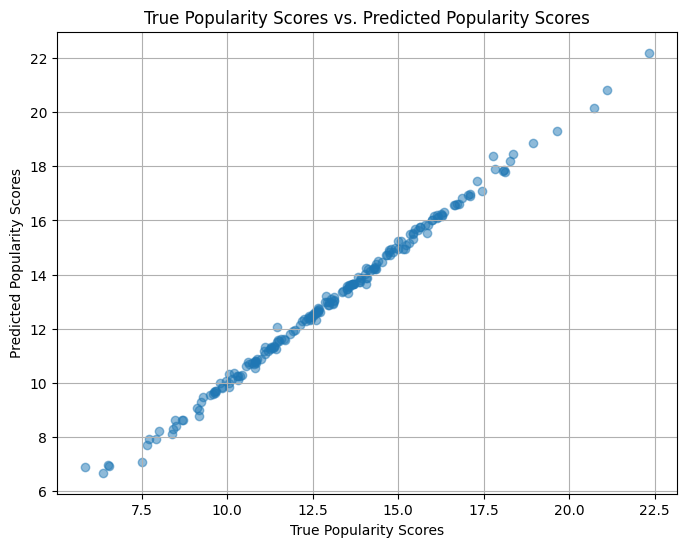

In [ ]:
# Visualize the relationship between true popularity scores and predicted popularity scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Popularity Scores vs. Predicted Popularity Scores')
plt.xlabel('True Popularity Scores')
plt.ylabel('Predicted Popularity Scores')
plt.grid(True)
plt.show()
